## Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Huh! Here we take on the challenge! As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.     Size of training set: 10683 records Size of test set: 2671 records FEATURES: Airline: The name of the airline. Date_of_Journey: The date of the journey Source: The source from which the service begins. Destination: The destination where the service ends. Route: The route taken by the flight to reach the destination. Dep_Time: The time when the journey starts from the source. Arrival_Time: Time of arrival at the destination. Duration: Total duration of the flight. Total_Stops: Total stops between the source and destination. Additional_Info: Additional information about the flight Price: The price of the ticket

In [216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [217]:
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [218]:
testdata = pd.read_excel('Test_set.xlsx')
testdata.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [219]:
merged_data = data.append(testdata,sort=False)
merged_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [220]:
merged_data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price               True
dtype: bool

In [221]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
Airline            13354 non-null object
Date_of_Journey    13354 non-null object
Source             13354 non-null object
Destination        13354 non-null object
Route              13353 non-null object
Dep_Time           13354 non-null object
Arrival_Time       13354 non-null object
Duration           13354 non-null object
Total_Stops        13353 non-null object
Additional_Info    13354 non-null object
Price              10683 non-null float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [222]:
round(100*(merged_data.isnull().sum())/len(merged_data),2)

Airline             0.00
Date_of_Journey     0.00
Source              0.00
Destination         0.00
Route               0.01
Dep_Time            0.00
Arrival_Time        0.00
Duration            0.00
Total_Stops         0.01
Additional_Info     0.00
Price              20.00
dtype: float64

### Treating Variables

In [223]:
merged_data['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [224]:
merged_data['Airline'] = merged_data['Airline'].replace('Multiple carriers Premium economy', 'Other Airline')
merged_data['Airline'] = merged_data['Airline'].replace('Jet Airways Business', 'Other Airline')
merged_data['Airline'] = merged_data['Airline'].replace('Vistara Premium economy', 'Other Airline')
merged_data['Airline'] = merged_data['Airline'].replace('Trujet', 'Other Airline')
merged_data['Airline'].value_counts()

Jet Airways          4746
IndiGo               2564
Air India            2192
Multiple carriers    1543
SpiceJet             1026
Vistara               608
Air Asia              405
GoAir                 240
Other Airline          30
Name: Airline, dtype: int64

### Treating journey date

In [225]:
merged_data['Date_of_Journey'].value_counts()

18/05/2019    633
6/06/2019     630
12/06/2019    628
9/05/2019     628
21/05/2019    615
9/06/2019     614
21/03/2019    516
15/05/2019    511
27/05/2019    447
24/06/2019    436
15/06/2019    433
1/06/2019     430
27/06/2019    430
3/06/2019     425
6/03/2019     405
24/03/2019    401
27/03/2019    364
24/05/2019    357
6/05/2019     355
1/05/2019     339
1/04/2019     335
12/05/2019    327
3/03/2019     280
9/03/2019     255
18/03/2019    197
15/03/2019    195
01/03/2019    186
12/03/2019    185
9/04/2019     149
3/04/2019     138
21/06/2019    133
18/06/2019    127
06/03/2019    123
03/03/2019    123
09/03/2019    123
3/05/2019     117
6/04/2019     114
24/04/2019    113
15/04/2019    112
27/04/2019    109
21/04/2019    104
18/04/2019     79
12/04/2019     74
1/03/2019      59
Name: Date_of_Journey, dtype: int64

In [226]:
merged_data['Date'] = merged_data['Date_of_Journey'].str.split('/').str[0]
merged_data['Month'] = merged_data['Date_of_Journey'].str.split('/').str[1]
merged_data['Year'] = merged_data['Date_of_Journey'].str.split('/').str[2]
merged_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [227]:
merged_data =merged_data.drop(['Date_of_Journey'],axis = 1)

### Source

In [228]:
merged_data['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

### Destination

In [229]:
merged_data['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

### Deaprture Time

In [230]:
merged_data['Dep_Time'].value_counts()

18:55    288
17:00    275
10:00    265
07:05    240
07:10    239
        ... 
12:45      1
22:30      1
16:25      1
03:00      1
22:25      1
Name: Dep_Time, Length: 223, dtype: int64

In [231]:
merged_data['Dep_Hours'] = merged_data['Dep_Time'].str.split(':').str[0]
merged_data['Dep_Minutes'] = merged_data['Dep_Time'].str.split(':').str[1]
merged_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,16,50


In [232]:
merged_data= merged_data.drop(['Dep_Time'],axis =1)

### Arrival time

In [233]:
merged_data['Arrival_Time'].value_counts()

19:00           536
21:00           466
19:15           434
16:10           185
12:35           159
               ... 
00:20 16 May      1
01:30 07 Apr      1
13:20 02 Mar      1
07:10 25 May      1
22:55 10 Jun      1
Name: Arrival_Time, Length: 1451, dtype: int64

In [234]:
merged_data['Arrival_Hours'] = merged_data['Arrival_Time'].str.split(':').str[0]
merged_data['Arrival_Minutes'] = merged_data['Arrival_Time'].str.split(':').str[1]
merged_data['Arrival_Mins'] = merged_data['Arrival_Minutes'].str.split(' ').str[0]
merged_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Arrival_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019,22,20,01,10 22 Mar,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,05,50,13,15,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019,09,25,04,25 10 Jun,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,18,05,23,30,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,16,50,21,35,35


In [235]:
merged_data= merged_data.drop(['Arrival_Time','Arrival_Minutes'],axis =1)

### Duration

In [236]:
merged_data['Duration'].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
32h 55m      1
47h 40m      1
47h          1
19h 50m      1
32h 25m      1
Name: Duration, Length: 374, dtype: int64

In [237]:
# Assigning and converting Duration column into list
duration = list(merged_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [238]:
merged_data['Duration_Hours'] = duration_hours
merged_data['Duration_Minutes'] = duration_mins
merged_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,03,2019,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,05,2019,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,06,2019,09,25,04,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,05,2019,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,01,03,2019,16,50,21,35,4,45


In [239]:
merged_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,03,2019,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,05,2019,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,06,2019,09,25,04,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,05,2019,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,01,03,2019,16,50,21,35,4,45


In [240]:
merged_data = merged_data.drop(['Duration'],axis=1)
merged_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,03,2019,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,05,2019,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,06,2019,09,25,04,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,05,2019,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,01,03,2019,16,50,21,35,4,45


### Total Stops

In [241]:
merged_data['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [242]:
merged_data['Total_Stops'] = merged_data['Total_Stops'].replace('non-stop', '0 stop')
merged_data['Total_Stops'].value_counts()

1 stop     7056
0 stop     4340
2 stops    1899
3 stops      56
4 stops       2
Name: Total_Stops, dtype: int64

In [243]:
merged_data[merged_data['Total_Stops'].isnull()]

merged_data['Total_Stops']=merged_data['Total_Stops'].fillna('1 stop')

In [244]:
merged_data['Stops'] = merged_data['Total_Stops'].str.split(' ').str[0]
merged_data= merged_data.drop(['Total_Stops'],axis = 1)
merged_data.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Minutes,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897.0,24,03,2019,22,20,01,10,2,50,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662.0,1,05,2019,05,50,13,15,7,25,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882.0,9,06,2019,09,25,04,25,19,0,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218.0,12,05,2019,18,05,23,30,5,25,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302.0,01,03,2019,16,50,21,35,4,45,1


### Additional Info

In [245]:
merged_data['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [246]:
merged_data['Additional_Info'] = merged_data['Additional_Info'].replace('1 Long layover', 'Other Info')
merged_data['Additional_Info'] = merged_data['Additional_Info'].replace('Change airports', 'Other Info')
merged_data['Additional_Info'] = merged_data['Additional_Info'].replace('Business class', 'Other Info')
merged_data['Additional_Info'] = merged_data['Additional_Info'].replace('No Info', 'Other Info')
merged_data['Additional_Info'] = merged_data['Additional_Info'].replace('2 Long layover', 'Other Info')
merged_data['Additional_Info'] = merged_data['Additional_Info'].replace('Red-eye flight', 'Other Info')
merged_data['Additional_Info'] = merged_data['Additional_Info'].replace('1 Short layover', 'Other Info')
merged_data['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
Other Info                         39
Name: Additional_Info, dtype: int64

### Price

In [247]:
merged_data['Price'].value_counts()

10262.0    258
10844.0    212
7229.0     162
4804.0     160
4823.0     131
          ... 
14462.0      1
6349.0       1
3758.0       1
6834.0       1
9585.0       1
Name: Price, Length: 1870, dtype: int64

In [248]:
merged_data['Price'].fillna((merged_data['Price'].mean()),inplace =True)

### Route

In [249]:
merged_data['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → DED → DEL → HYD             1
BOM → BLR → CCU → BBI → HYD       1
BLR → HBX → BOM → NAG → DEL       1
BOM → UDR → DEL → HYD             1
BOM → JDH → JAI → DEL → HYD       1
Name: Route, Length: 132, dtype: int64

In [250]:
merged_data['Route1'] = merged_data['Route'].str.split('→').str[0]
merged_data['Route2'] = merged_data['Route'].str.split('→').str[1]
merged_data['Route3'] = merged_data['Route'].str.split('→').str[2]
merged_data['Route4'] = merged_data['Route'].str.split('→').str[3]
merged_data['Route5'] = merged_data['Route'].str.split('→').str[4]
merged_data.head()

,Airline,Source,Destination,Route,Additional_Info,Price,Date,Month,Year,Dep_Hours,...,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Minutes,Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897.0,24,03,2019,22,...,01,10,2,50,0,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662.0,1,05,2019,05,...,13,15,7,25,2,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882.0,9,06,2019,09,...,04,25,19,0,2,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218.0,12,05,2019,18,...,23,30,5,25,1,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302.0,01,03,2019,16,...,21,35,4,45,1,BLR,NAG,DEL,NaN,NaN


In [251]:
merged_data['Route1'].fillna('None',inplace = True)
merged_data['Route2'].fillna('None',inplace = True)
merged_data['Route3'].fillna('None',inplace = True)
merged_data['Route4'].fillna('None',inplace = True)
merged_data['Route5'].fillna('None',inplace = True)

In [252]:
merged_data = merged_data.drop(['Route'],axis = 1)

In [253]:
merged_data.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Minutes,Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,03,2019,22,20,01,10,2,50,0,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,05,2019,05,50,13,15,7,25,2,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,06,2019,09,25,04,25,19,0,2,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,05,2019,18,05,23,30,5,25,1,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,01,03,2019,16,50,21,35,4,45,1,BLR,NAG,DEL,None,None


In [254]:
round(100*(merged_data.isnull().sum())/len(merged_data),2)

Airline             0.0
Source              0.0
Destination         0.0
Additional_Info     0.0
Price               0.0
Date                0.0
Month               0.0
Year                0.0
Dep_Hours           0.0
Dep_Minutes         0.0
Arrival_Hours       0.0
Arrival_Mins        0.0
Duration_Hours      0.0
Duration_Minutes    0.0
Stops               0.0
Route1              0.0
Route2              0.0
Route3              0.0
Route4              0.0
Route5              0.0
dtype: float64

In [255]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 20 columns):
Airline             13354 non-null object
Source              13354 non-null object
Destination         13354 non-null object
Additional_Info     13354 non-null object
Price               13354 non-null float64
Date                13354 non-null object
Month               13354 non-null object
Year                13354 non-null object
Dep_Hours           13354 non-null object
Dep_Minutes         13354 non-null object
Arrival_Hours       13354 non-null object
Arrival_Mins        13354 non-null object
Duration_Hours      13354 non-null int64
Duration_Minutes    13354 non-null int64
Stops               13354 non-null object
Route1              13354 non-null object
Route2              13354 non-null object
Route3              13354 non-null object
Route4              13354 non-null object
Route5              13354 non-null object
dtypes: float64(1), int64(2), object(17)
memory usage

In [256]:
merged_data['Date'] = merged_data['Date'].astype(int)
merged_data['Month'] = merged_data['Month'].astype(int)
merged_data['Year'] = merged_data['Year'].astype(int)

merged_data['Dep_Hours'] = merged_data['Dep_Hours'].astype(int)
merged_data['Dep_Minutes'] = merged_data['Dep_Minutes'].astype(int)

merged_data['Arrival_Hours'] = merged_data['Arrival_Hours'].astype(int)
merged_data['Arrival_Mins'] = merged_data['Arrival_Mins'].astype(int)

merged_data['Duration_Hours'] = merged_data['Duration_Hours'].astype(int)
merged_data['Duration_Minutes'] = merged_data['Duration_Minutes'].astype(int)

merged_data['Stops'] = merged_data['Stops'].astype(int)

In [257]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 20 columns):
Airline             13354 non-null object
Source              13354 non-null object
Destination         13354 non-null object
Additional_Info     13354 non-null object
Price               13354 non-null float64
Date                13354 non-null int32
Month               13354 non-null int32
Year                13354 non-null int32
Dep_Hours           13354 non-null int32
Dep_Minutes         13354 non-null int32
Arrival_Hours       13354 non-null int32
Arrival_Mins        13354 non-null int32
Duration_Hours      13354 non-null int32
Duration_Minutes    13354 non-null int32
Stops               13354 non-null int32
Route1              13354 non-null object
Route2              13354 non-null object
Route3              13354 non-null object
Route4              13354 non-null object
Route5              13354 non-null object
dtypes: float64(1), int32(10), object(9)
memory usage: 1.6+ M

## Handling categorical variables

In [258]:
# Subset all categorical variabl
merged_data_categorical=merged_data.select_dtypes(include=['object'])
merged_data_categorical

,Airline,Source,Destination,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,No info,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,No info,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,No info,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,No info,DEL,BOM,COK,None,None


## EDA

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

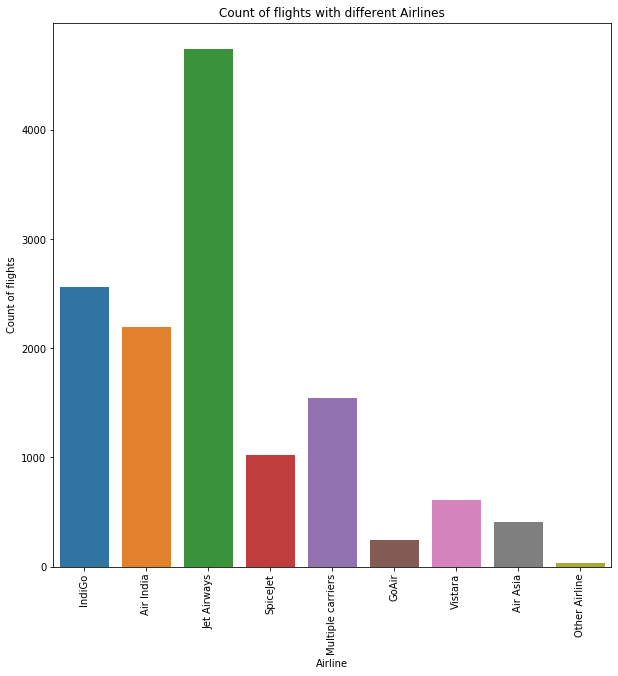

In [259]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = merged_data)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

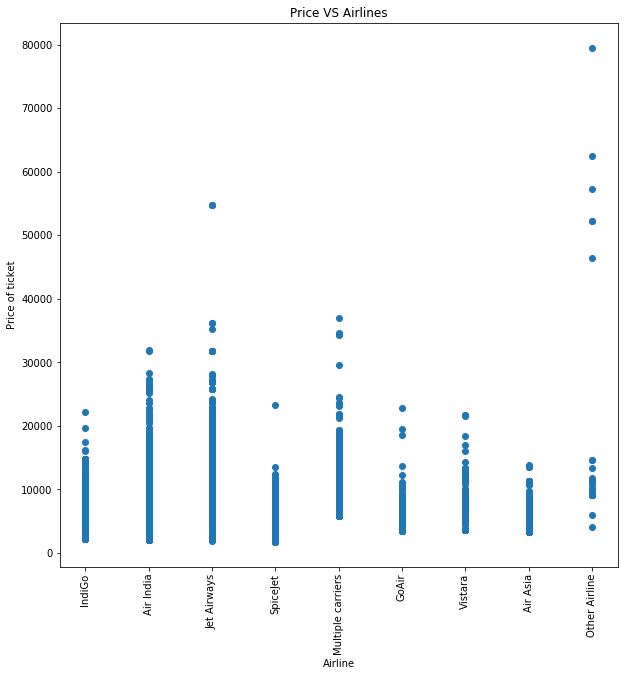

In [260]:
plt.figure(figsize = (10, 10))
plt.title('Price VS Airlines')
plt.scatter(merged_data['Airline'], merged_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

Text(0, 0.5, 'Price of ticket')

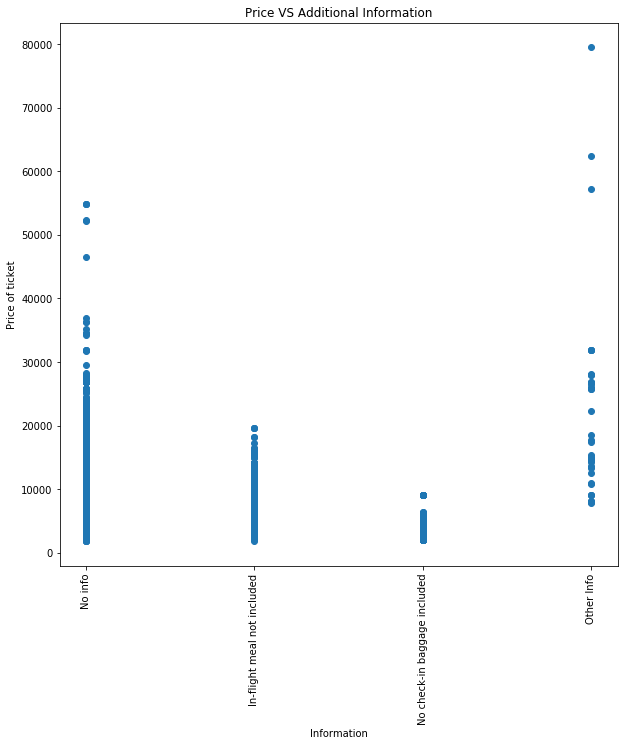

In [261]:

plt.figure(figsize = (10, 10))
plt.title('Price VS Additional Information')
plt.scatter(merged_data['Additional_Info'], merged_data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

### Dummifying categorical variables

In [262]:
# Convert into dummies
merged_data_dummies = pd.get_dummies(merged_data[['Airline','Source','Destination']], drop_first=True)
merged_data_dummies.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other Airline,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [263]:
merged_data['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
Other Info                         39
Name: Additional_Info, dtype: int64

In [264]:

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

merged_data.drop(["Route1","Route2","Route3","Route4","Route5", "Additional_Info"], axis = 1, inplace = True)


# Also dropping dummy variable

merged_data.drop(['Airline','Source','Destination'],axis = 1, inplace = True)

In [265]:
# Adding the results to master Dataframe
merged_data = pd.concat([merged_data, merged_data_dummies], axis = 1)
merged_data.head()

,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Minutes,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897.0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,7662.0,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,13882.0,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,6218.0,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,13302.0,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


## Model Building

## Scaling

In [266]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [267]:
# Subset all categorical variabl
merged_data_numerical=merged_data.select_dtypes(include=['float64','int32'])
merged_data_numerical

,Price,Date,Month,Year,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Mins,Duration_Hours,Duration_Minutes,Stops
0,3897.000000,24,3,2019,22,20,1,10,2,50,0
1,7662.000000,1,5,2019,5,50,13,15,7,25,2
2,13882.000000,9,6,2019,9,25,4,25,19,0,2
3,6218.000000,12,5,2019,18,5,23,30,5,25,1
4,13302.000000,1,3,2019,16,50,21,35,4,45,1
...,...,...,...,...,...,...,...,...,...,...,...
2666,9087.064121,6,6,2019,20,30,20,25,23,55,1
2667,9087.064121,27,3,2019,14,20,16,55,2,35,0
2668,9087.064121,6,3,2019,21,50,4,25,6,35,1
2669,9087.064121,6,3,2019,4,0,19,15,15,15,1


In [268]:


# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['Price','Date','Month','Year','Dep_Hours','Dep_Minutes','Arrival_Hours','Arrival_Mins','Duration_Hours','Duration_Minutes','Stops']

merged_data[var] = scaler.fit_transform(merged_data[var])

## Model Building¶

In [269]:
y = merged_data['Price']
X = merged_data.drop('Price', axis = 1)

In [270]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=100)

In [271]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (9347, 27)
The size of training output is (9347,)
**************************************************
The size of testing input is (4007, 27)
The size of testing output is (4007,)


## Machine Learning Models

### 1. Baseline Model

In [272]:
y_train_pred = np.ones(X_train.shape[0]) * y_train.mean()
y_test_pred = np.ones(X_test.shape[0]) * y_train.mean()

In [273]:
from math import sqrt
print("Train Results for Baseline Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Baseline Model:
--------------------------------------------------
Root mean squared error:  0.05295835875008711
R-squared:  0.0


In [274]:
print("Test Results for Baseline Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Baseline Model:
--------------------------------------------------
Root mean squared error:  0.053244085326753156
R-squared:  -0.0003027585552186629


### 2. KNN Regressor

In [275]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [276]:
print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(n_neighbors=9)


{'n_neighbors': 9}

In [277]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [278]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  0.03143446340926266
R-squared:  0.6476753184935976


In [279]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  0.03670712085292242
R-squared:  0.5245669503938228


### 3. Ridge Regression

In [280]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [281]:
print(ridge_regressor.best_estimator_)
ridge_regressor.best_params_

Ridge(alpha=1)


{'alpha': 1}

In [282]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [283]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  0.03840734181841811
R-squared:  0.474031825352359


In [284]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  0.039388762188183636
R-squared:  0.45256395276440253


### Lasso Regression

In [285]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [286]:
print(lasso_regressor.best_estimator_)
lasso_regressor.best_params_

Lasso(alpha=0.0001)


{'alpha': 0.0001}

In [287]:
y_train_pred =lasso_regressor.predict(X_train) ##Predict train result
y_test_pred =lasso_regressor.predict(X_test) ##Predict test result

In [288]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  0.03852184091959466
R-squared:  0.47089114193404835


In [289]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  0.03970570807464895
R-squared:  0.44371850206541297


### 5.Decision Tree Regressor

In [290]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [291]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(max_depth=8)


{'max_depth': 8}

In [292]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [293]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.028601271492046856
R-squared:  0.7083233613900521


In [294]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.036743096761827125
R-squared:  0.5236345690250467


### Random Forest Regressor

In [295]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [296]:
print(random_regressor.best_estimator_)
random_regressor.best_params_

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300)


{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4}

In [297]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [298]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.024951818590423277
R-squared:  0.7780089967176651


In [299]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.034290797560666504
R-squared:  0.5850995577770741


### 7. XGBoost Regressor

In [300]:
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor

from sklearn.preprocessing import LabelEncoder
import joblib

In [301]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [302]:

print(model.best_estimator_)
model.best_params_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=10.0, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


{'reg_lambda': 10.0, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1}

In [303]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [304]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  0.024533046831200063
R-squared:  0.7853979129897778


In [305]:

print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  0.03245336522666286
R-squared:  0.6283721955517539


### 8. Stacking

In [306]:

# Initializing models
ridge = Ridge()
lasso = Lasso()
tree = DecisionTreeRegressor()
knn = KNeighborsRegressor()

stack = StackingRegressor(regressors = [ridge, lasso, knn], meta_regressor = tree)
stack.fit(X_train, y_train)

StackingRegressor(meta_regressor=DecisionTreeRegressor(),
                  regressors=[Ridge(), Lasso(), KNeighborsRegressor()])

In [307]:
print(stack.regr_)
stack.meta_regr_

[Ridge(), Lasso(), KNeighborsRegressor()]


DecisionTreeRegressor()

In [308]:
y_train_pred = stack.predict(X_train)
y_test_pred = stack.predict(X_test)

In [309]:

print("Train Results for Stacking Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Stacking Regressor Model:
--------------------------------------------------
Root mean squared error:  0.012137519014731599
R-squared:  0.9474720064548718


In [310]:
print("Test Results for Stacking Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Stacking Regressor Model:
--------------------------------------------------
Root mean squared error:  0.044568825631780336
R-squared:  0.29910799424884393


In [311]:
win_model = XGBRegressor(reg_lambda =10.0, n_estimators= 500, max_depth=5, learning_rate= 0.1)
win_model.fit(X_train, y_train)
joblib.dump(win_model, 'winning_model_XBBoost_regressor.pkl')

['winning_model_XBBoost_regressor.pkl']